In [1]:
import scanpy as sc
import anndata
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
import numpy as np
import os
import pandas as pd

In [2]:
X = io.mmread("ALTH.combined_PRORE_counts2.mtx")

In [3]:
# create anndata object
adata = anndata.AnnData(
    X=X.transpose().tocsr()
)


/tmp/ipykernel_4639/2116505952.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = anndata.AnnData(


In [4]:
# load cell metadata:
cell_meta = pd.read_csv("ALTH.combined_PRORE_metadata2.csv")

In [5]:
# load gene names:
with open("ALTH.combined_PRORE_gene_names2.csv", 'r') as f:
    gene_names = f.read().splitlines()

In [6]:
# set anndata observations and index obs by barcodes, var by gene names
adata.obs = cell_meta
adata.obs.index = adata.obs['barcode']
adata.var.index = gene_names


In [7]:
# load dimensional reduction:
pca = pd.read_csv("ALTH.combined_PRORE_pca2.csv")
pca.index = adata.obs.index

In [8]:
# set pca and umap
adata.obsm['X_pca'] = pca.to_numpy()
adata.obsm['X_umap'] = np.vstack((adata.obs['UMAP_1'].to_numpy(), adata.obs['UMAP_2'].to_numpy())).T

/home/mayurd/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/mayurd/miniconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


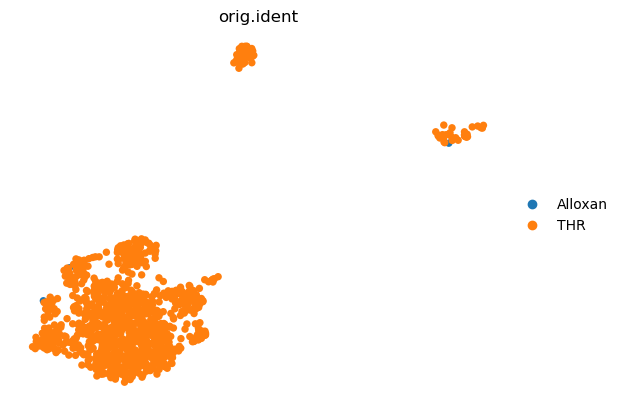

In [9]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['orig.ident'], frameon=False, save=True)

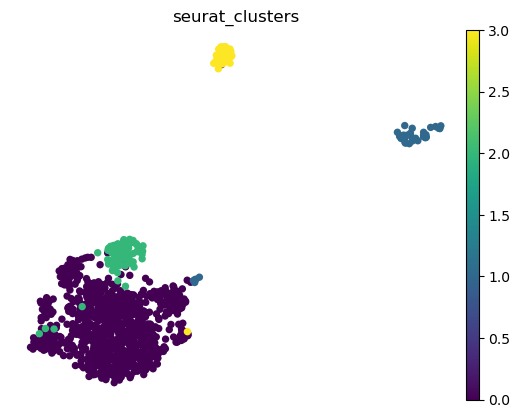

In [10]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['seurat_clusters'], frameon=False, save=True)

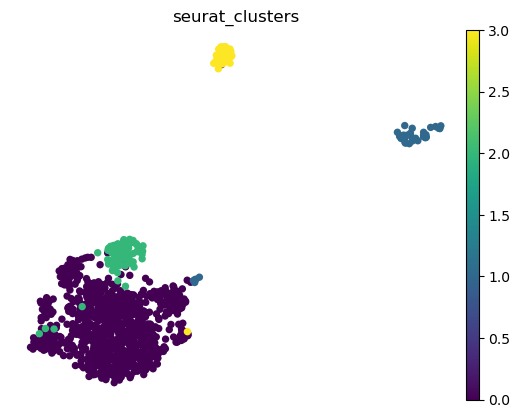

In [11]:
# plot a UMAP colored by sampleID to test:
sc.pl.umap(adata, color=['seurat_clusters'], frameon=False, save=True)

In [12]:
print(adata)

AnnData object with n_obs × n_vars = 1056 × 32287
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'integrated_snn_res.0.3', 'seurat_clusters', 'CellType', 'integrated_snn_res.0.1', 'barcode', 'UMAP_1', 'UMAP_2', 'nCount_SCT', 'nFeature_SCT'
    uns: 'orig.ident_colors'
    obsm: 'X_pca', 'X_umap'


In [13]:
# save dataset as anndata format
adata.write('ALTH.combined_PRORE2.h5ad')

In [14]:
# reload dataset
adata = sc.read_h5ad('ALTH.combined_PRORE2.h5ad')

In [15]:
print(adata)
print(adata.shape)

AnnData object with n_obs × n_vars = 1056 × 32287
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'integrated_snn_res.0.3', 'seurat_clusters', 'CellType', 'integrated_snn_res.0.1', 'barcode', 'UMAP_1', 'UMAP_2', 'nCount_SCT', 'nFeature_SCT'
    uns: 'orig.ident_colors'
    obsm: 'X_pca', 'X_umap'
(1056, 32287)
